<a href="https://www.kaggle.com/code/suyashkapil/basic-digit-recognizer?scriptVersionId=117446170" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Importing Libraries**

In [18]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.neural_network import MLPClassifier as mlp
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
#This is a classification problem. So, algorithms like linear regression aren't required here.
#Will try all these algorithms and see what works best.

# **Finding the training dataset**

In [2]:
idnum = pd.read_csv('../input/digit-recognizer/train.csv') #Dataset downloaded from https://www.kaggle.com/c/digit-recognizer. It is an MNIST dataset
idnum 

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Describing the data**

In [3]:
idnum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
idnum.isnull().sum() #no values are null, so imputing isn't needed here

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

Shows there are no null values in any column .Dataset is already clean.

# **Displaying digits using matplotlib**

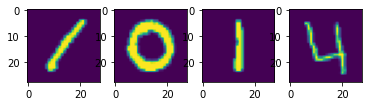

In [12]:
for i in range(4) :
    plt.subplot(1,4,i+1)
    plt.imshow(idnum.iloc[i,1:].values.reshape(28,28))

Shows first 4 entries in the dataset

# **Loading the test dataset**

In [13]:
idtest = pd.read_csv('../input/digit-recognizer/test.csv') #this test csv is again downloaded from Kaggle
idtest      #train_test_split can be used to create test dataset in casse test dataset isn't provided

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
idtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


# **Using K Nearest Neighbors**

After using many algorithms, K nearest neighbors gave highest accuracy.

In [15]:
x = idnum.drop(columns = ['label'])  
y = idnum['label'] #y_train(named y here) is the labels of each number i.e. 0 to 9, the identity of the number`
model = mlp()#model selected for classifiying the numbers
#models can be changed easily. just replace knc() here by svc() or any other algorithm and change their parameters
model.fit(x,y) #fitting the x_train and y_train in the model
pred = model.predict(idtest) #the predictions of the model using k neighbors classifier 
pred

array([2, 0, 9, ..., 3, 9, 2])

# **Imaging the first five labels**

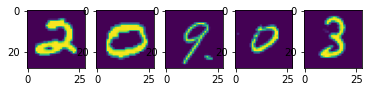

In [21]:
for i in range(5) :
    plt.subplot(1,5,i+1)
    plt.imshow(idtest.iloc[i,:].values.reshape(28,28))

It is visible that 4th entry is incorrectly predicted. (see next code cell output)

# **Preparing the result dataframe**

In [19]:
Label = np.arange(1,28001,1)  #Arange will create an array of numbers from 1 to 28000, used as index here
result = pd.DataFrame(index = Label) #creating a dataframe of the result
result['Label'] = pred #The label column of the result dataframe is the predictions done
result.set_index(Label) 
result.index.name = 'ImageId'
result
#this result can be converted to a csv by using pd.to_csv('name_of_the_csv.csv')


,Label
ImageId,
1,2
2,0
3,9
4,9
5,3
...,...
27996,9
27997,7
27998,3


# **Finding the accuracy of the model**

In [20]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2) #cross validation
pred1 =model.predict(x_test) 
score = accuracy_score(y_test, pred1)
score*100
#The accuracy score of this model using 10 neighbors is more than 97
# This was the best accuracy after using algorithms like SVM,Decision Tree,etc.
# The accuracy was highest using 10 neighbors in KNN
# UPDATE(version9) :using MLPClassifier(default), accuracy is 99.6(highest till now)

99.44047619047619